# Decahedral Nanoparticle

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from psm.segments import Segments
from psm.build import lattice_segment
from psm import plotutils

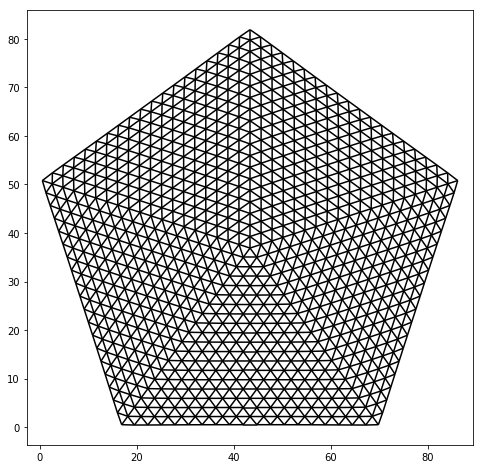

In [2]:
points = np.load('data/pt_decahedron.npy')

segments = Segments(points)
segments.build_graph(.2)

fig,ax=plt.subplots(figsize=(8,8))
segments.show_edges(ax=ax);

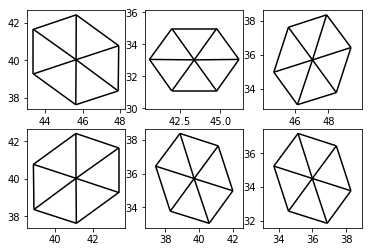

In [3]:
segments.traversals(max_depth=2)
segments.show(6, nrows=2);

IndexError: list index out of range

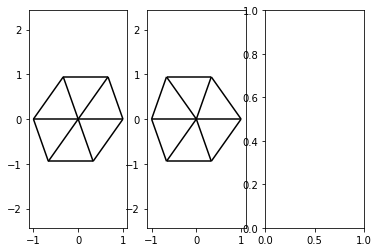

In [14]:
a = [1, 0]
b = [1/3., -2*np.sqrt(2)/3.]

templates = lattice_segment(a, b, max_depth=2)

templates = templates[0].detach()

templates.extend(templates[0].detach())
templates[1].set_point(6, [templates[1].points[4,0],templates[1].points[6,1]])
templates[1].set_point(1, [templates[1].points[3,0],templates[1].points[1,1]])

#emplates.extend(templates[0].detach())

templates.extend(templates[0].detach([0,2,3,4,5]))
templates[2].add_points(templates[2].points[[0,1,4]] + [0,4])

axes = templates.show(3);
#for ax in axes:
#    ax.axis('off')

In [5]:
rmsd = segments.register(templates, transform='similarity', pivot='cop')

 [||||||||||||||||||||] 2853/2853 registrations


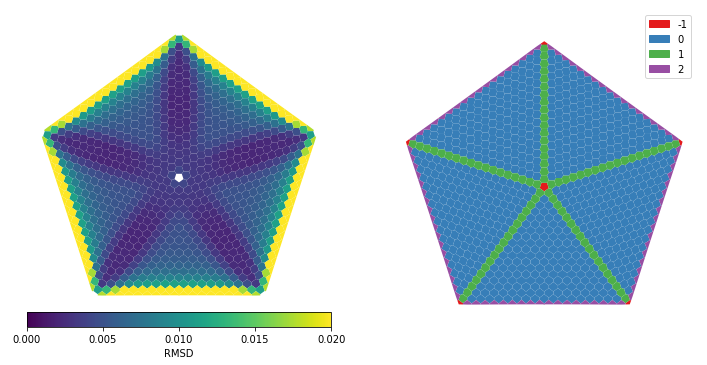

In [6]:
best_match, best_rmsd = segments.best_matches()

fig,axes = plt.subplots(1,2,figsize=(12,6))

_, p = plotutils.voronoi_plot(segments, axes[0], c=best_rmsd, cmap='viridis', vmin=0, vmax=.02)
plotutils.add_colorbar(axes[0], label='RMSD', cmap='viridis', vmin=0, vmax=.02)

_, p = plotutils.voronoi_plot(segments, axes[1], labels=best_match, cmap=plt.cm.Set1.colors)

for ax in axes.ravel():
    ax.axis('equal')
    ax.axis('off')

In [7]:
unique, counts = np.unique(best_match, return_counts=True)

print('Bulk:\t\t', counts[1])
print('Stacking fault:\t', counts[2])
print('<100>-facet:\t', counts[3])

Bulk:		 765
Stacking fault:	 90
<100>-facet:	 90


In [8]:
strain, rotation = segments.calc_strain(adjust_zero='median', rmsd_max=.05)

planar = np.trace(strain, axis1=1, axis2=2) / 2

valid = np.isnan(rotation) == 0
rotation[valid] = (rotation[valid] - 3/2 * np.pi) % np.pi

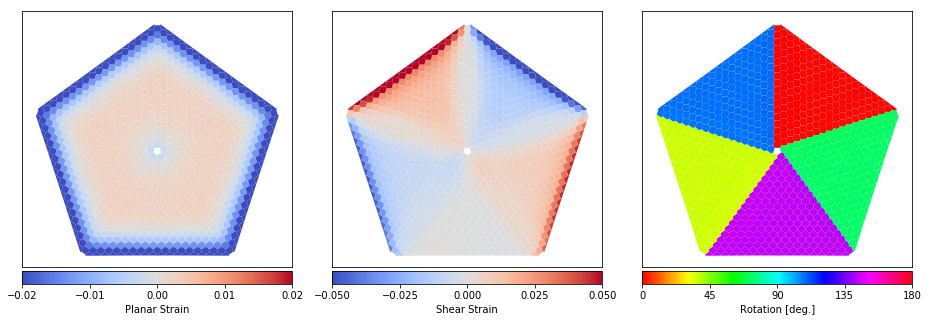

In [9]:
fig,axes = plt.subplots(1,3,figsize=(13,6))

plotutils.voronoi_plot(segments, axes[0], c=planar, cmap='coolwarm', vmin=-.02, vmax=.02)
plotutils.add_colorbar(axes[0], label='Planar Strain', cmap='coolwarm', vmin=-.02, vmax=.02)

plotutils.voronoi_plot(segments, axes[1], c=strain[:,0,1], cmap='coolwarm', vmin=-.05, vmax=.05)
plotutils.add_colorbar(axes[1], label='Shear Strain', cmap='coolwarm', vmin=-.05, vmax=.05)

plotutils.voronoi_plot(segments, axes[2], c=rotation / np.pi * 180, cmap='hsv', vmin=0, vmax=180)
plotutils.add_colorbar(axes[2], label='Rotation [deg.]', cmap='hsv', vmin=0, vmax=180)

for ax in axes:
    ax.axis('equal')
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()